<a href="https://colab.research.google.com/github/projectwint/practice_AI/blob/main/CNN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import numpy as np

image_w = 128
image_h = 128

#이미지 불러오기
X_train, X_test, y_train, y_test = np.load('/content/drive/MyDrive/이미지 분류 프로젝트(2023)/train_set.npy', allow_pickle=True)
X_train = X_train.astype(float)
X_test = X_test.astype(float)

#가중치 계산 ()
w0 = np.mean(y_train)
w1 = 1 - w0
class_weights = {0: w0, 1: w1}

#CNN에서 컨볼루션 레이어를 거치면 주요 특징만 추출돼서 학습됨. 
model = Sequential()
model.add(Conv2D(32, (3, 3), padding = "same", input_shape = (image_w, image_h, 3), activation = "relu"))
#Conv2D를 이용
#3x3 크기의 컨볼루션 레이어를 32개의 필터수만큼 처음에 생성한다.
#입력형태(input_shpae)는 128 x 128이기 때문에 (128, 128, 3)의 tuple 값을 가짐
#활성화 함수는 relu를 사용
model.add(MaxPooling2D(pool_size = (2, 2)))
#MaxPooling2D: 주요값을 뽑아내서 작은 출력값을 만들고, 사소한 변화는 무시한다. 

model.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import os
from keras.callbacks import EarlyStopping, ModelCheckpoint

model_dir = '/content/model'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)
model_path = model_dir + "/ground_water_classify5.model"

checkpoint = ModelCheckpoint(filepath = model_path, monitor = 'val_loss', verbos = 1, save_best_only = True)
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 5)

history = model.fit(X_train, y_train, epochs=100, class_weight = class_weights, batch_size=128, validation_split = 0.20, callbacks = [checkpoint, early_stopping])

Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 29.8321 - accuracy: 0.7509

34/34 [==============================] - 303s 9s/step - loss: 29.8321 - accuracy: 0.7509 - val_loss: 0.5011 - val_accuracy: 0.8662
Epoch 2/100
34/34 [==============================] - 298s 9s/step - loss: 0.1308 - accuracy: 0.8885 - val_loss: 0.5708 - val_accuracy: 0.8058
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 0.0993 - accuracy: 0.9196

34/34 [==============================] - 306s 9s/step - loss: 0.0993 - accuracy: 0.9196 - val_loss: 0.4822 - val_accuracy: 0.8411
Epoch 4/100
34/34 [==============================] - ETA: 0s - loss: 0.0844 - accuracy: 0.9347

34/34 [==============================] - 300s 9s/step - loss: 0.0844 - accuracy: 0.9347 - val_loss: 0.3240 - val_accuracy: 0.8290
Epoch 5/100
34/34 [==============================] - 292s 9s/step - loss: 0.0819 - accuracy: 0.9305 - val_loss: 0.4850 - val_accuracy: 0.7760
Epoch 6/100
34/34 [==============================] - ETA: 0s - loss: 0.0792 - accuracy: 0.9340

34/34 [==============================] - 295s 9s/step - loss: 0.0792 - accuracy: 0.9340 - val_loss: 0.2818 - val_accuracy: 0.8216
Epoch 7/100
34/34 [==============================] - ETA: 0s - loss: 0.0679 - accuracy: 0.9442

34/34 [==============================] - 294s 9s/step - loss: 0.0679 - accuracy: 0.9442 - val_loss: 0.2324 - val_accuracy: 0.8559
Epoch 8/100
34/34 [==============================] - ETA: 0s - loss: 0.0597 - accuracy: 0.9477

34/34 [==============================] - 295s 9s/step - loss: 0.0597 - accuracy: 0.9477 - val_loss: 0.2271 - val_accuracy: 0.8680
Epoch 9/100
34/34 [==============================] - ETA: 0s - loss: 0.0632 - accuracy: 0.9466

34/34 [==============================] - 288s 9s/step - loss: 0.0632 - accuracy: 0.9466 - val_loss: 0.2111 - val_accuracy: 0.8866
Epoch 10/100
34/34 [==============================] - 295s 9s/step - loss: 0.0516 - accuracy: 0.9549 - val_loss: 0.2263 - val_accuracy: 0.8578
Epoch 11/100
34/34 [==============================] - 292s 9s/step - loss: 0.0540 - accuracy: 0.9538 - val_loss: 0.2251 - val_accuracy: 0.8736
Epoch 12/100
34/34 [==============================] - ETA: 0s - loss: 0.0400 - accuracy: 0.9656

34/34 [==============================] - 296s 9s/step - loss: 0.0400 - accuracy: 0.9656 - val_loss: 0.1858 - val_accuracy: 0.8829
Epoch 13/100
34/34 [==============================] - 292s 9s/step - loss: 0.0373 - accuracy: 0.9677 - val_loss: 0.1927 - val_accuracy: 0.8848
Epoch 14/100
34/34 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9670

34/34 [==============================] - 294s 9s/step - loss: 0.0362 - accuracy: 0.9670 - val_loss: 0.1599 - val_accuracy: 0.9080
Epoch 15/100
34/34 [==============================] - ETA: 0s - loss: 0.0381 - accuracy: 0.9696

34/34 [==============================] - 292s 9s/step - loss: 0.0381 - accuracy: 0.9696 - val_loss: 0.1361 - val_accuracy: 0.9229
Epoch 16/100
34/34 [==============================] - 287s 8s/step - loss: 0.0420 - accuracy: 0.9675 - val_loss: 0.1432 - val_accuracy: 0.9238
Epoch 17/100
34/34 [==============================] - ETA: 0s - loss: 0.0373 - accuracy: 0.9658

34/34 [==============================] - 288s 9s/step - loss: 0.0373 - accuracy: 0.9658 - val_loss: 0.1224 - val_accuracy: 0.9545
Epoch 18/100
34/34 [==============================] - 285s 8s/step - loss: 0.0290 - accuracy: 0.9768 - val_loss: 0.1252 - val_accuracy: 0.9405
Epoch 19/100
34/34 [==============================] - 286s 8s/step - loss: 0.0325 - accuracy: 0.9754 - val_loss: 0.1465 - val_accuracy: 0.9164
Epoch 20/100
34/34 [==============================] - 285s 8s/step - loss: 0.0337 - accuracy: 0.9758 - val_loss: 0.1481 - val_accuracy: 0.9154
Epoch 21/100
34/34 [==============================] - 288s 9s/step - loss: 0.0502 - accuracy: 0.9600 - val_loss: 0.2001 - val_accuracy: 0.9024
Epoch 22/100
34/34 [==============================] - ETA: 0s - loss: 0.0278 - accuracy: 0.9777

34/34 [==============================] - 288s 9s/step - loss: 0.0278 - accuracy: 0.9777 - val_loss: 0.0723 - val_accuracy: 0.9796
Epoch 23/100
34/34 [==============================] - 291s 9s/step - loss: 0.0281 - accuracy: 0.9803 - val_loss: 0.1554 - val_accuracy: 0.9368
Epoch 24/100
34/34 [==============================] - 290s 9s/step - loss: 0.0198 - accuracy: 0.9826 - val_loss: 0.0817 - val_accuracy: 0.9740
Epoch 25/100
34/34 [==============================] - ETA: 0s - loss: 0.0203 - accuracy: 0.9835

34/34 [==============================] - 291s 9s/step - loss: 0.0203 - accuracy: 0.9835 - val_loss: 0.0532 - val_accuracy: 0.9823
Epoch 26/100
34/34 [==============================] - 292s 9s/step - loss: 0.0206 - accuracy: 0.9819 - val_loss: 0.0821 - val_accuracy: 0.9721
Epoch 27/100
34/34 [==============================] - 291s 9s/step - loss: 0.0427 - accuracy: 0.9651 - val_loss: 0.2085 - val_accuracy: 0.8931
Epoch 28/100
34/34 [==============================] - 288s 9s/step - loss: 0.0396 - accuracy: 0.9789 - val_loss: 0.1129 - val_accuracy: 0.9647
Epoch 29/100
34/34 [==============================] - 293s 9s/step - loss: 0.0207 - accuracy: 0.9849 - val_loss: 0.1099 - val_accuracy: 0.9656
Epoch 30/100
34/34 [==============================] - 291s 9s/step - loss: 0.0311 - accuracy: 0.9768 - val_loss: 0.0554 - val_accuracy: 0.9777


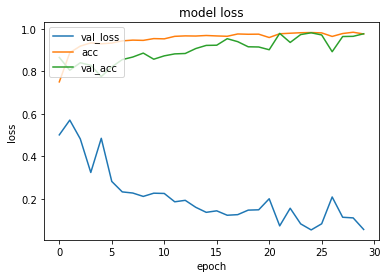

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['val_loss', 'acc', 'val_acc'], loc = 'upper left')

plt. show()

In [ ]:
model.evaluate(X_test, y_test)

19/19 [==============================] - 18s 929ms/step - loss: 0.0735 - accuracy: 0.9682


[0.07351146638393402, 0.9682274460792542]